### 导入包

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

### 导入数据

In [2]:
data = '/content/drive/MyDrive/adult.csv'
df = pd.read_csv(data, header=None, sep=',\s')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
#加入列名
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df.columns = col_names

In [4]:
df.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [5]:
#查看是否有空缺值
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.shape

(32561, 15)

### 数据处理

#### 类别变量

In [6]:
#把文本型数据分出来
categorial = []
for var in df.columns:
  if df[var].dtype=='object':
    categorial.append(var)

In [7]:
print(categorial)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [8]:
#观察每列不同类别的一个频率分布情况
for var in categorial:
  print(df[var].value_counts()/np.float(len(df)))

Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: workclass, dtype: float64
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: float64
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: marital_status, dtype: float64


从数据频率分布可以看出**workclass**, **occupation** 和 **native_country**都包含一个缺失的类别，所以需要把含有这些值的行删掉，否则影响后续分类

In [11]:
df['workclass'].replace('?',np.NaN,inplace=True)
df['occupation'].replace('?',np.NaN,inplace=True)
df['native_country'].replace('?',np.NaN,inplace=True)

In [12]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [13]:
df.dropna(inplace=True)#不返回东西，只修改data里的值
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

#### 数值型变量

In [14]:
numerical = []
for var in df.columns:
  if df[var].dtype!='object':
    numerical.append(var)

In [15]:
print(numerical)

['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [16]:
df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [17]:
df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

### 分特征向量和目标变量

In [18]:
X=df.drop(['income'],axis=1)
y=df['income']

### 切分训练集和测试集

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=511)

In [20]:
X_train.shape,X_test.shape

((19605, 14), (10557, 14))

#### 变量编码

In [23]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 390 kB/s 


In [24]:
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
encoder = ce.OneHotEncoder(cols=cate)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [26]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,fnlwgt,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,education_9,education_10,education_11,education_12,education_13,education_14,education_15,education_16,education_num,marital_status_1,marital_status_2,marital_status_3,marital_status_4,marital_status_5,marital_status_6,marital_status_7,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7,...,native_country_2,native_country_3,native_country_4,native_country_5,native_country_6,native_country_7,native_country_8,native_country_9,native_country_10,native_country_11,native_country_12,native_country_13,native_country_14,native_country_15,native_country_16,native_country_17,native_country_18,native_country_19,native_country_20,native_country_21,native_country_22,native_country_23,native_country_24,native_country_25,native_country_26,native_country_27,native_country_28,native_country_29,native_country_30,native_country_31,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
133,37,1,0,0,0,0,0,0,254202,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31919,44,1,0,0,0,0,0,0,228057,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29760,58,0,1,0,0,0,0,0,212864,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15791,39,1,0,0,0,0,0,0,314007,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,11,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20356,63,1,0,0,0,0,0,0,125954,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### 特征缩放

把所有特征变量映射到相同的比例上

In [28]:
cols = X_train.columns
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
#转回数据框
X_train=pd.DataFrame(X_train,columns=[cols])
X_test=pd.DataFrame(X_test,columns=[cols])

### 建立模型

In [38]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X=X_train,y=y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


GaussianNB()

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA()
lda.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


LinearDiscriminantAnalysis()

#### 预测

In [40]:
y_pred_NB = gnb.predict(X_test)
y_pred_NB

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array(['<=50K', '<=50K', '>50K', ..., '>50K', '>50K', '<=50K'],
      dtype='<U5')

In [41]:
y_pred_lda = lda.predict(X_test)
y_pred_lda

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array(['<=50K', '<=50K', '<=50K', ..., '>50K', '<=50K', '<=50K'],
      dtype='<U5')

In [42]:
Nb_result=pd.DataFrame()
Nb_result['pred']=list(y_pred_NB)
Nb_result['true']=list(y_test)

In [45]:
Nb_result.head(5)

,pred,true
0,<=50K,<=50K
1,<=50K,<=50K
2,>50K,<=50K
3,>50K,>50K
4,<=50K,<=50K


In [44]:
lda_result=pd.DataFrame()
lda_result['pred']=list(y_pred_lda)
lda_result['true']=list(y_test)

In [60]:
lda_result.head(5)

,pred,true
0,<=50K,<=50K
1,<=50K,<=50K
2,<=50K,<=50K
3,>50K,>50K
4,<=50K,<=50K


#### 检查准确率

In [46]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_NB)))

Model accuracy score: 0.8005


In [47]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_lda)))

Model accuracy score: 0.8381


In [48]:
y_pred_train_NB = gnb.predict(X_train)
y_pred_train_lda = lda.predict(X_train)
print('NB Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_NB)))
print('LDA Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_lda)))

NB Training-set accuracy score: 0.8005
LDA Training-set accuracy score: 0.8383


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


零精度是指通过预测最频繁的类可以达到的精度。
对比零精度以看我们模型的准确率是否好

In [50]:
y_test.value_counts()

<=50K    7953
>50K     2604
Name: income, dtype: int64

In [51]:
null_accuracy = (7953/(7953+2604))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7533


#### 混淆矩阵

混淆矩阵是一种用来总结分类算法性能的工具。混淆矩阵可以让我们清楚地了解分类模型的性能以及模型产生的错误类型。它根据每个类别对正确和不正确的预测进行了总结。摘要以表格形式表示。

在评估分类模型性能时，可能有四种类型的结果。这四种结果描述如下

真正的积极因素(TP)——当我们预测某一观察结果属于某一类，而该观察结果实际上也属于那一类时，就会出现真正的积极因素。

真正的否定(TN)——当我们预测一个观察结果不属于某一类，而这个观察结果实际上也不属于那一类时，就会出现真正的否定。

误报(FP) -当我们预测某个观察结果属于某个类别，但实际上该观察结果并不属于那个类别时，就会出现误报。这种类型的错误称为第一类错误。

假阴性(FN) -当我们预测一个观察结果不属于某个特定的类别，但实际上该观察结果属于那个类别时，就会出现假阴性。这是一个非常严重的错误，它被称为第二类错误。

这四种结果总结在下列混淆矩阵中。

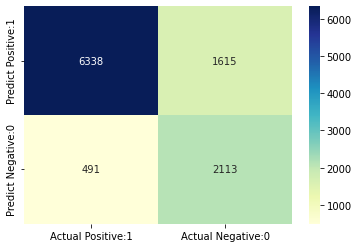

In [53]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred_NB)
cm_matrix = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

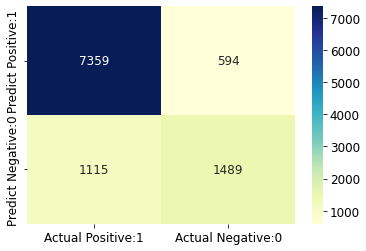

In [62]:
cm2 = confusion_matrix(y_test, y_pred_lda)
cm_matrix = pd.DataFrame(data=cm2, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

#### 各项指标

In [54]:
#NB
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86      7953
        >50K       0.57      0.81      0.67      2604

    accuracy                           0.80     10557
   macro avg       0.75      0.80      0.76     10557
weighted avg       0.84      0.80      0.81     10557



In [63]:
#LDA
print(classification_report(y_test, y_pred_lda))

              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      7953
        >50K       0.71      0.57      0.64      2604

    accuracy                           0.84     10557
   macro avg       0.79      0.75      0.77     10557
weighted avg       0.83      0.84      0.83     10557



#### ROC

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


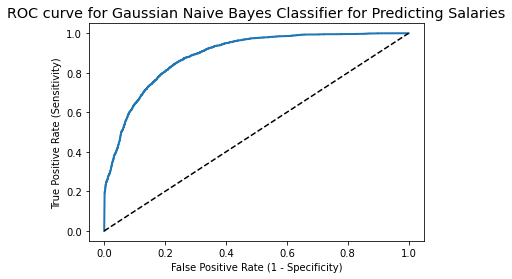

In [56]:
# plot ROC Curve
from sklearn.metrics import roc_curve
y_pred1_NB = gnb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred1_NB, pos_label = '>50K')
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

ROC-AUC
ROC-AUC代表受试者工作特征-曲线下面积。它是一种比较分类器性能的技术。在这种技术中，我们测量曲线下的面积(AUC)。一个完美的分类器将有一个ROC AUC等于1，而一个纯粹的随机分类器将有一个ROC AUC等于0.5。

ROC曲线下面积是ROC曲线下面积的百分比。

In [57]:
# compute ROC AUC
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred1_NB)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8891


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


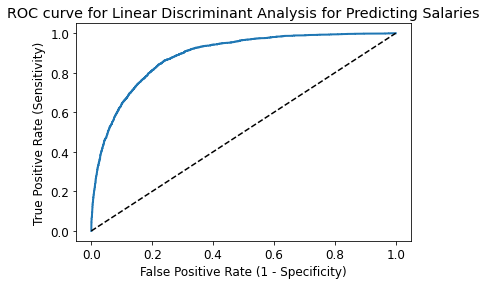

In [65]:
y_pred1_lda = lda.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred1_lda, pos_label = '>50K')
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Linear Discriminant Analysis for Predicting Salaries')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [66]:
ROC_AUC = roc_auc_score(y_test, y_pred1_lda)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8869
